File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()

Monthly aggregated data by PostalCode (head):


,Month,PostalCode,MonthlyTotalPremium,MonthlyTotalClaims
0,2023-01-01,12345,1000,100
1,2023-02-01,67890,2000,200
2,2023-03-01,12345,3000,300
3,2023-05-01,67890,5000,500



Monthly changes by PostalCode (head):


,Month,PostalCode,MonthlyTotalPremium,MonthlyTotalClaims,PremiumChange,ClaimsChange
2,2023-03-01,12345,3000,300,2000.0,200.0
3,2023-05-01,67890,5000,500,3000.0,300.0


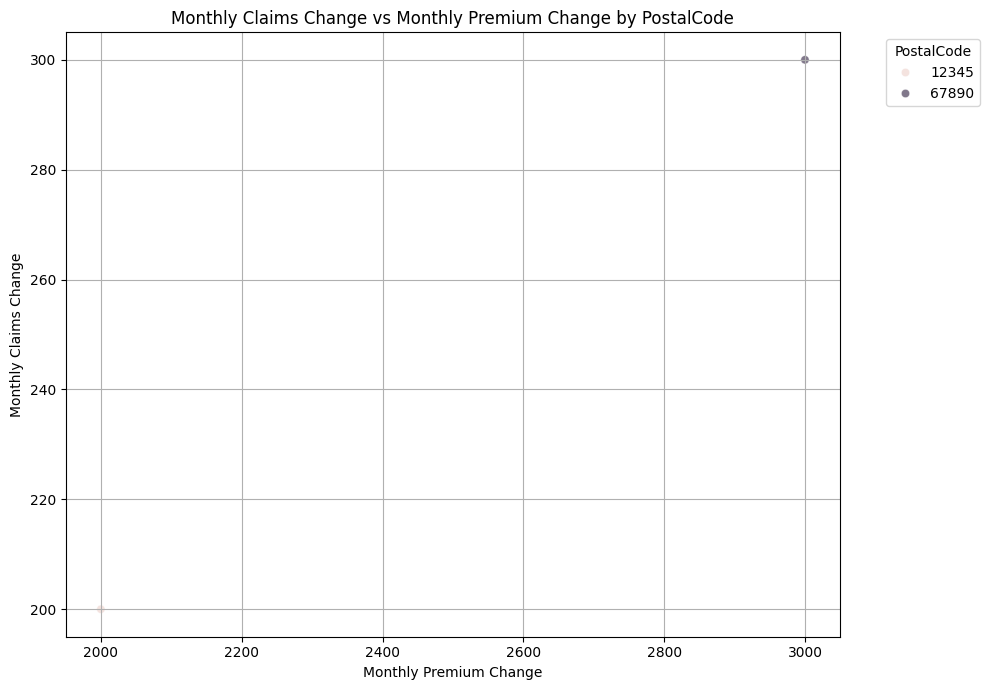


Correlation Matrix for Monthly Changes (all PostalCodes):


,PremiumChange,ClaimsChange
PremiumChange,1.0,1.0
ClaimsChange,1.0,1.0


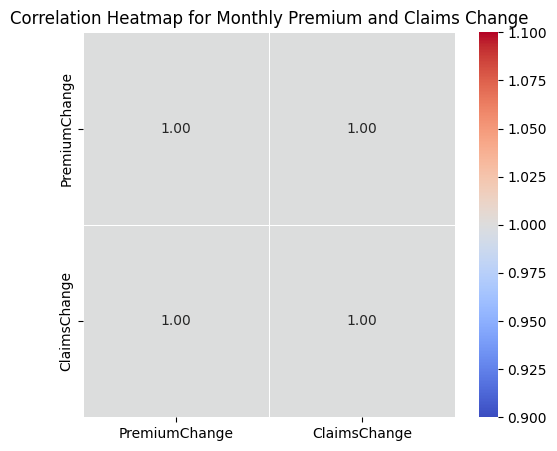

.

File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


Output()

Output()

Output()

Output()

.

File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()


Distribution of Cover Type by Province:

Plot is saved to test_plots\Distribution of Insurance Cover Type by Province.png.



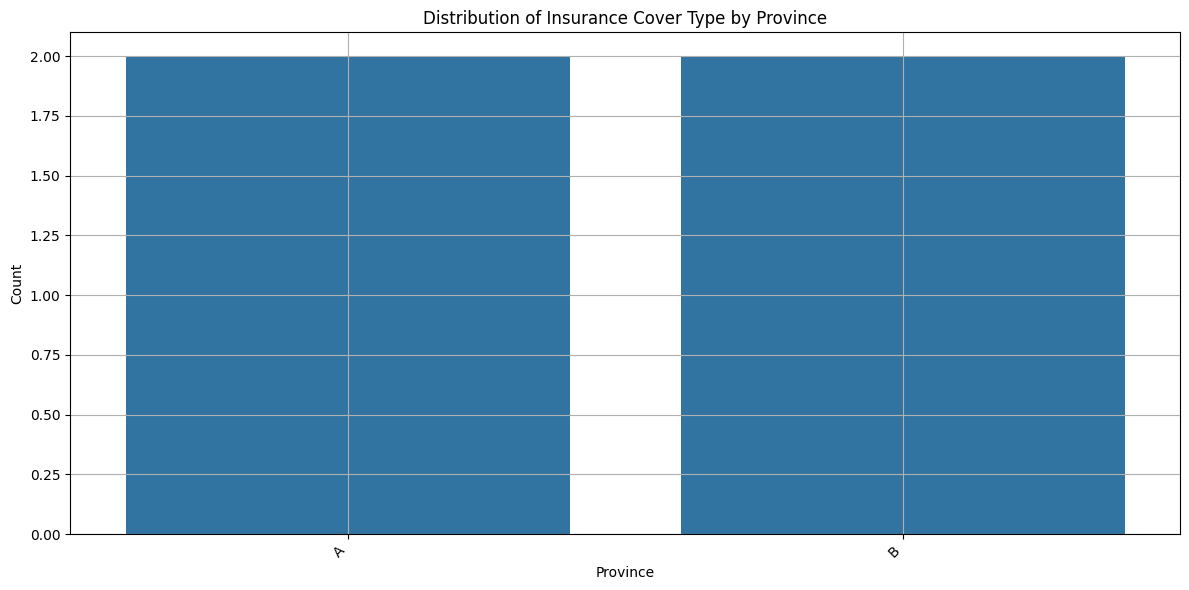


Average TotalPremium by Province:


Province
B    3500.0
A    2000.0
Name: TotalPremium, dtype: float64

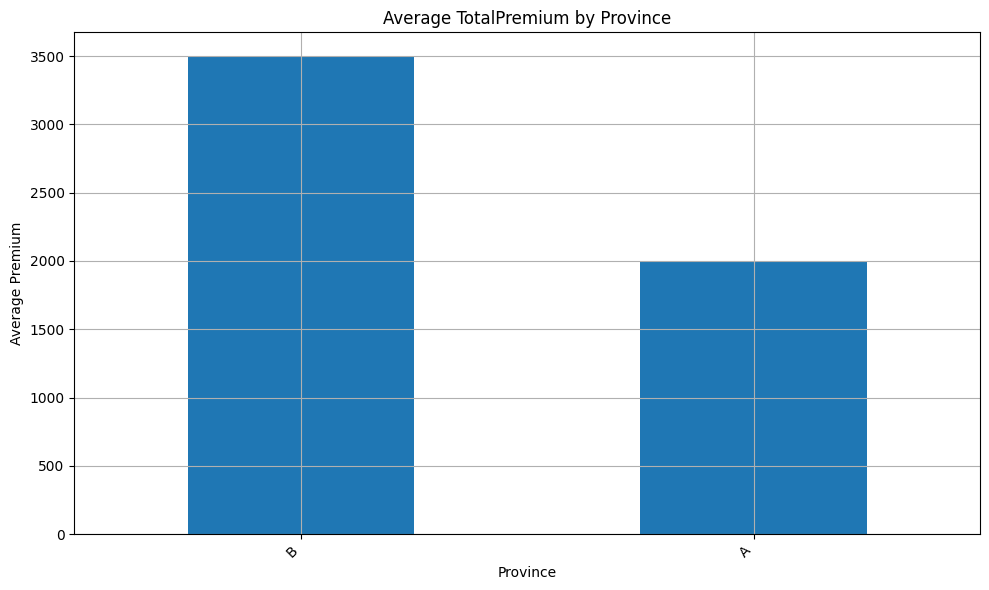


Distribution of Top Auto Makes by Province:(head)


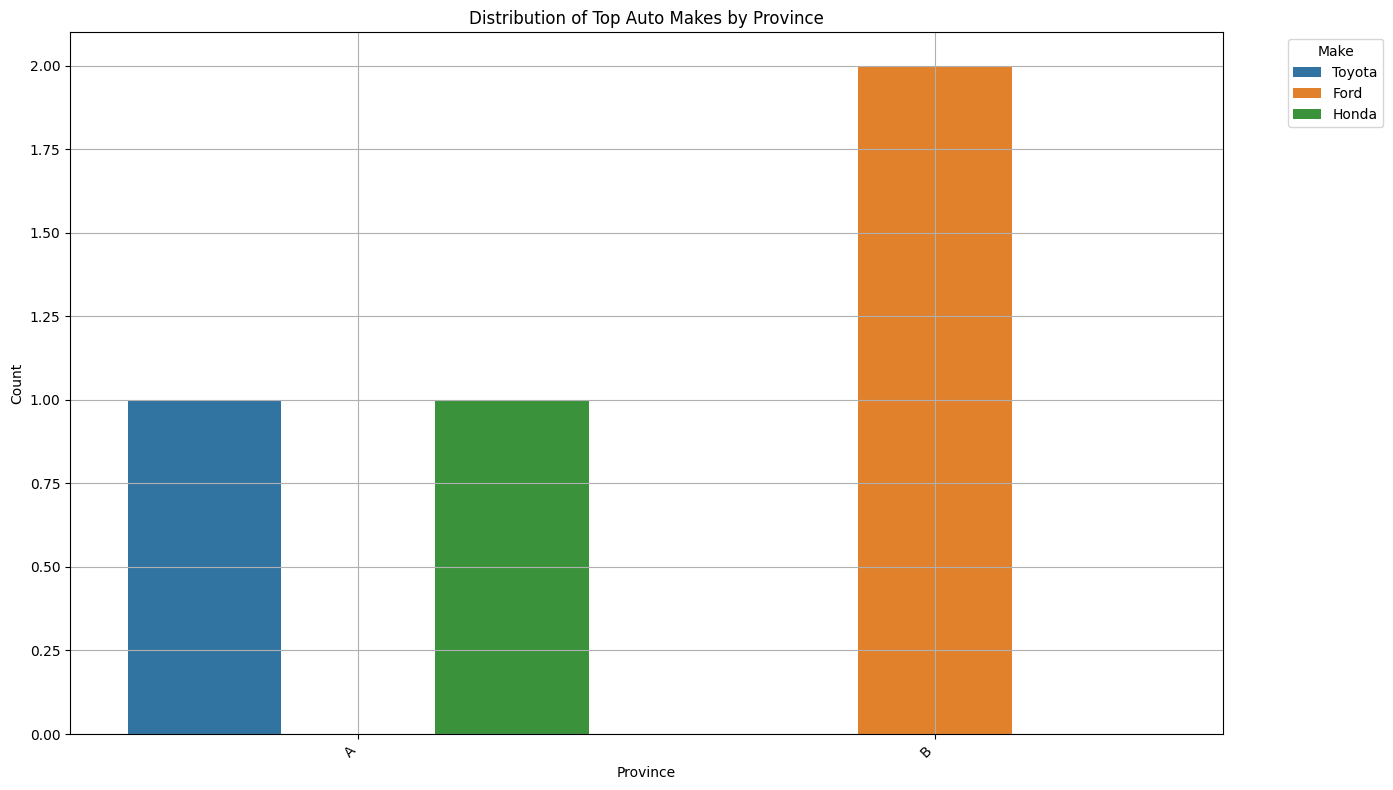

.

File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()

.

File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()

Average Claim Amount by Vehicle Make (Top 10):


Make
Ford      350.0
Honda     300.0
Toyota    100.0
Name: TotalClaims, dtype: float64


Average Claim Amount by Vehicle Model (Top 10):


Model
Mustang    500.0
Civic      300.0
F-150      200.0
Camry      100.0
Name: TotalClaims, dtype: float64

.

File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()


Plotting Box Plots for Outlier Detection in Numerical Columns:


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


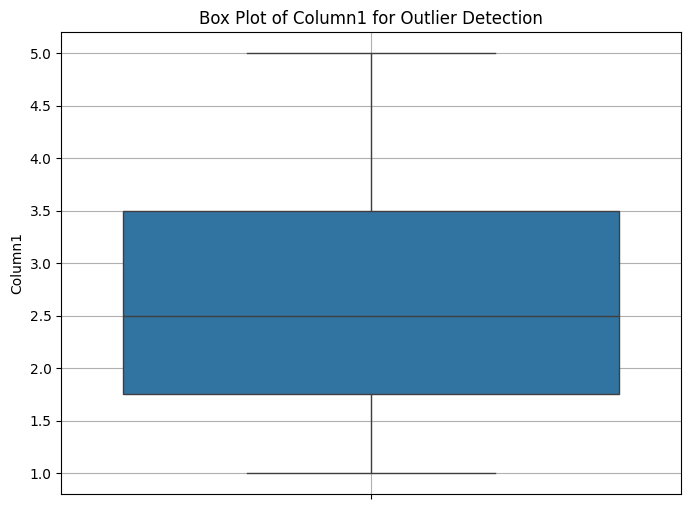

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


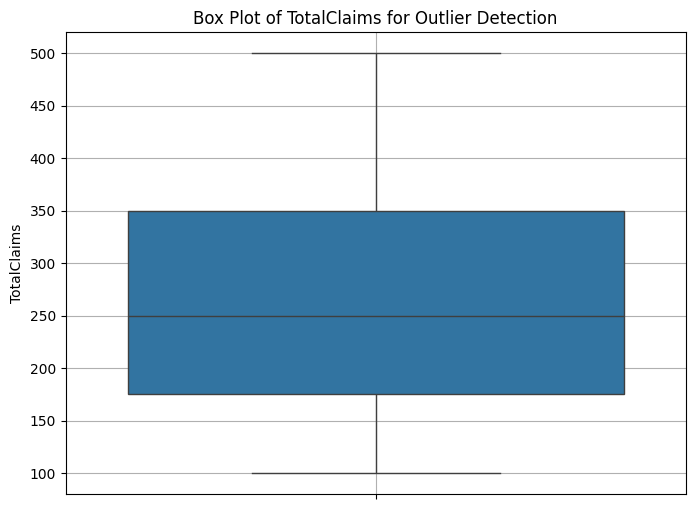

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



Plot is saved to test_plots\Box Plot of TotalPremium for Outlier Detection.png.



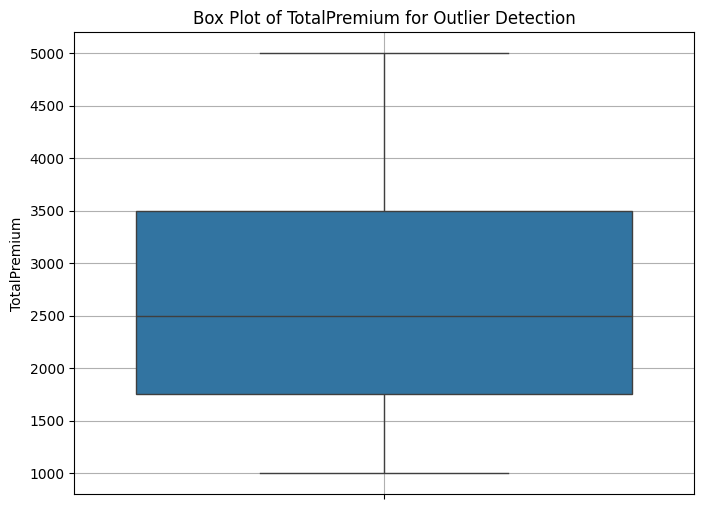

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


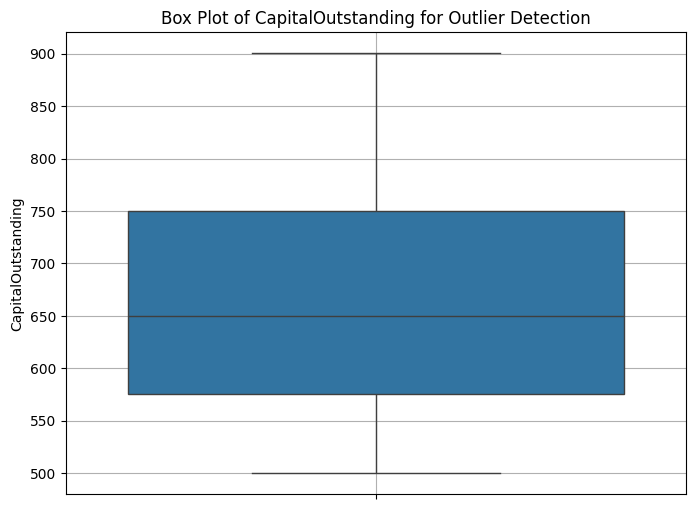

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


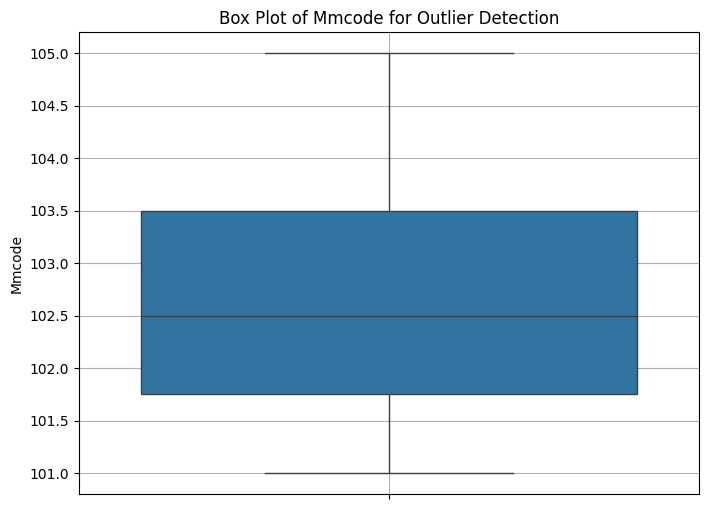

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


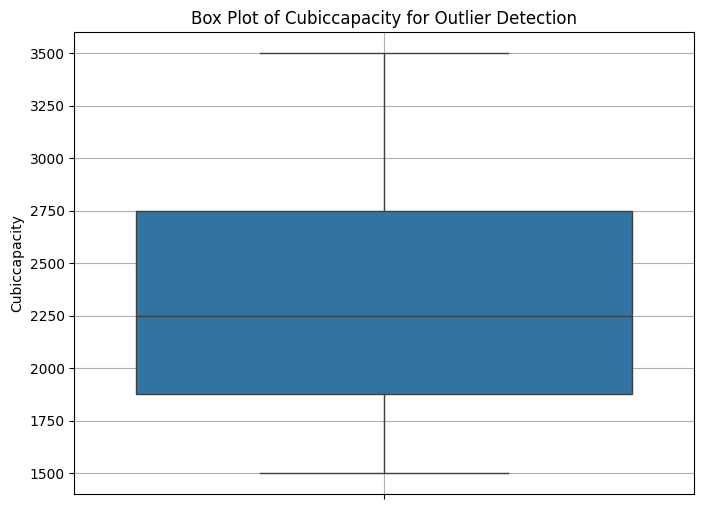

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


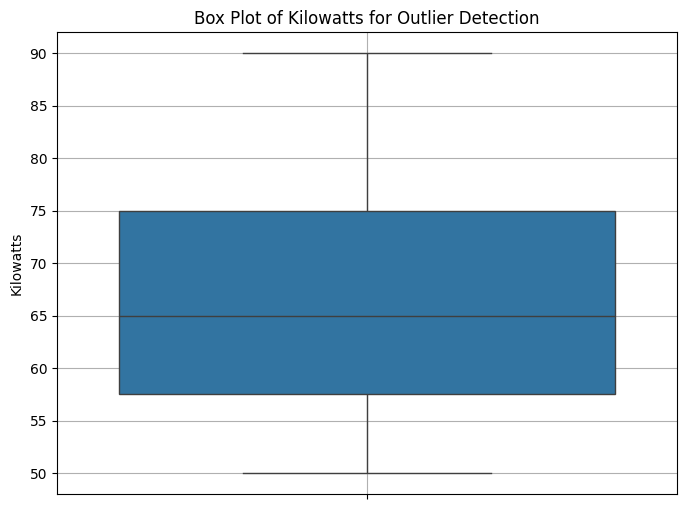

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


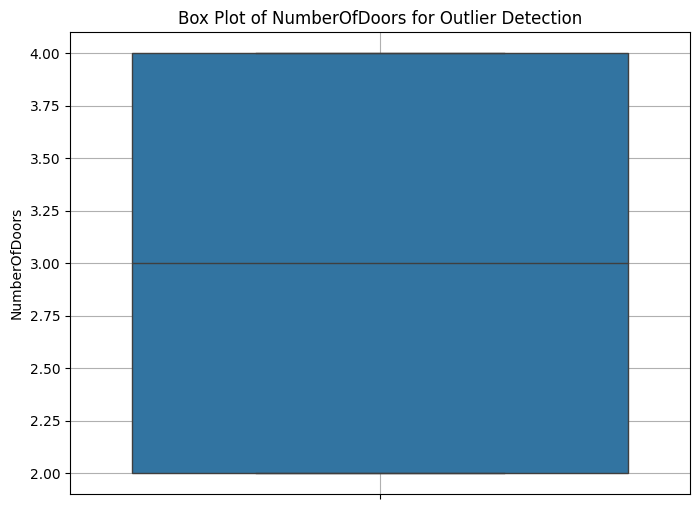

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


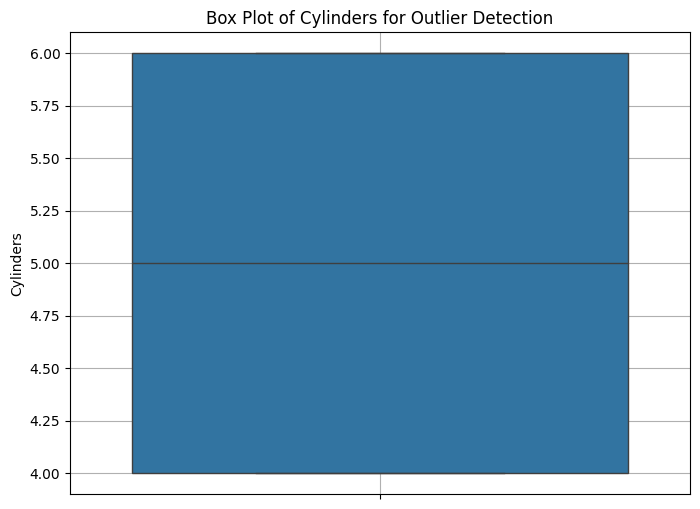

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


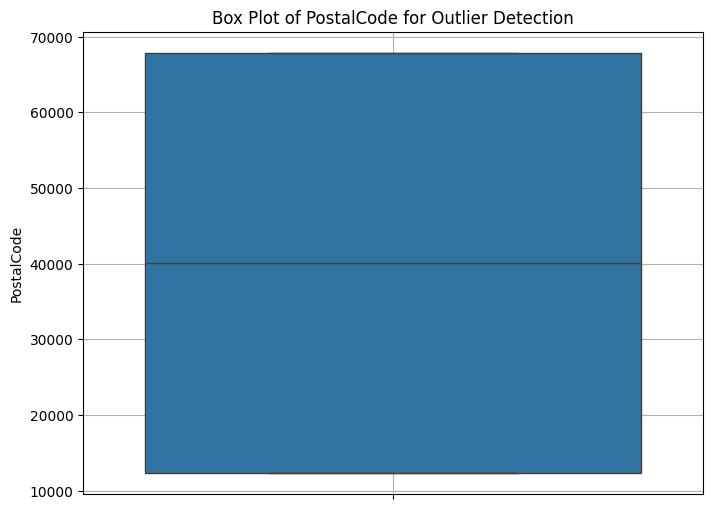

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


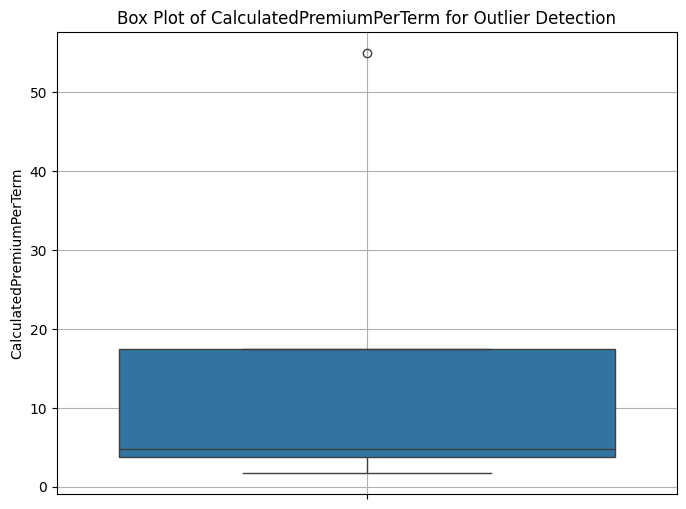

.

File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()

Claim Frequency per month (head):


TransactionMonth
2023-01    1
2023-02    1
2023-03    1
2023-05    1
Freq: M, dtype: int64


Claim Severity per month (head):


TransactionMonth
2023-01    100.0
2023-02    200.0
2023-03    300.0
2023-05    500.0
Freq: M, Name: TotalClaims, dtype: float64


Plot is saved to test_plots\Claim Frequency and Claim Severity per Month.png.



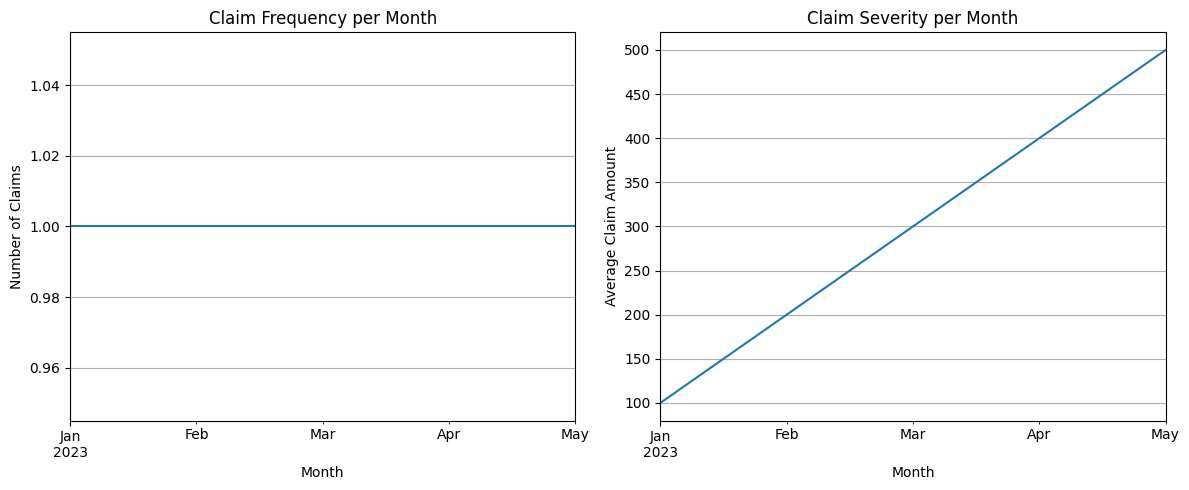

.

File read successfully!

DataFrame is preprocessed.

Prrocessed DataFrame Saved to: test_output\processed_insurance_data.csv


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` m

Output()

Output()

Output()

Output()

Plotting Histograms for Numerical Columns:


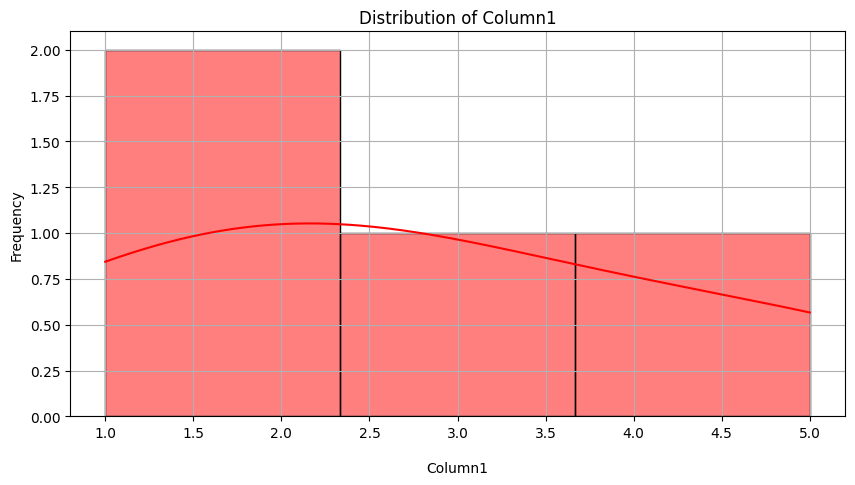

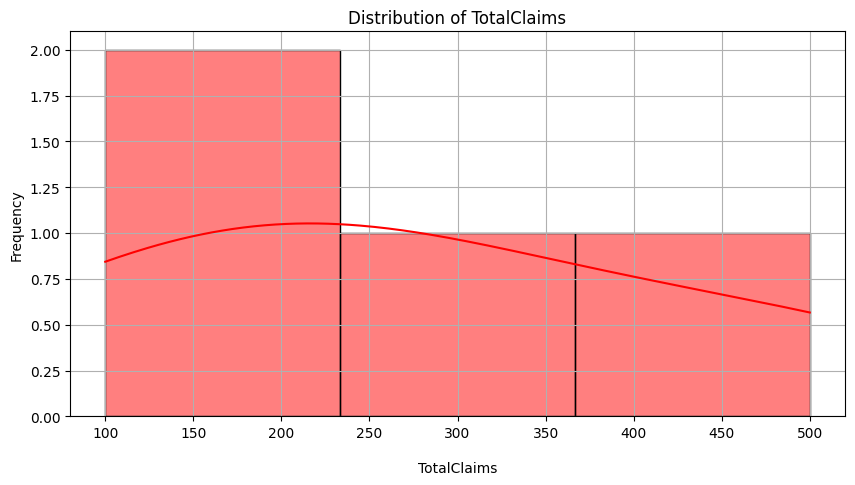

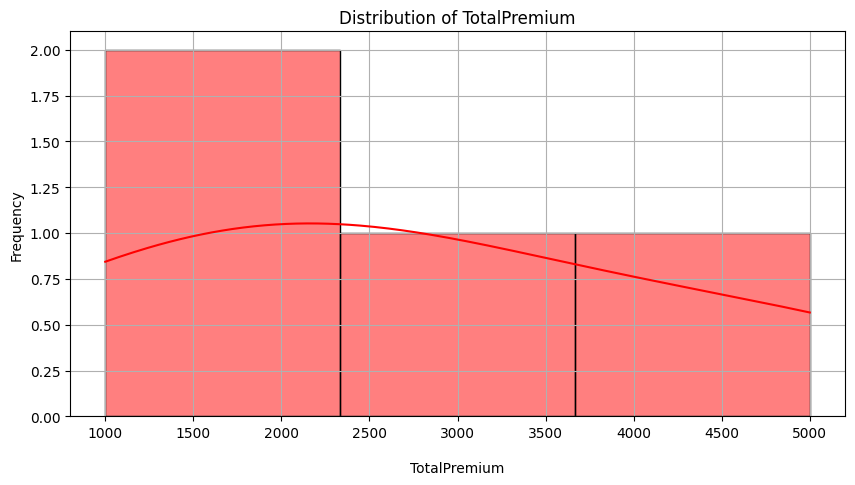

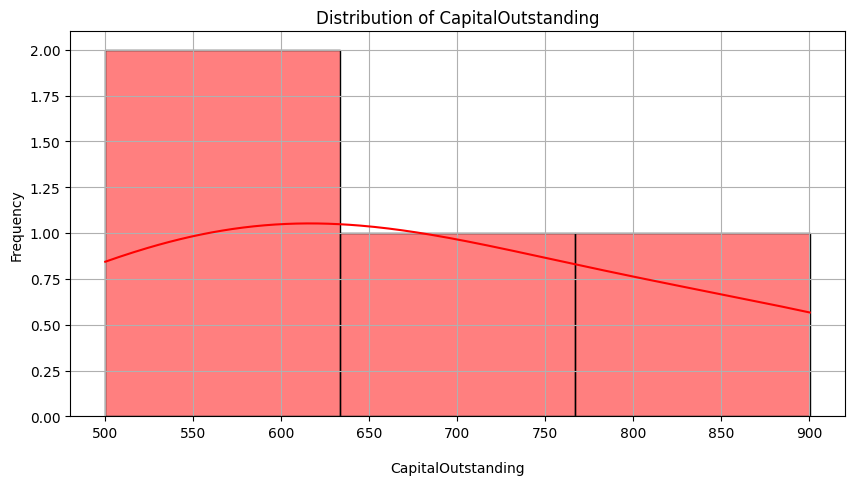

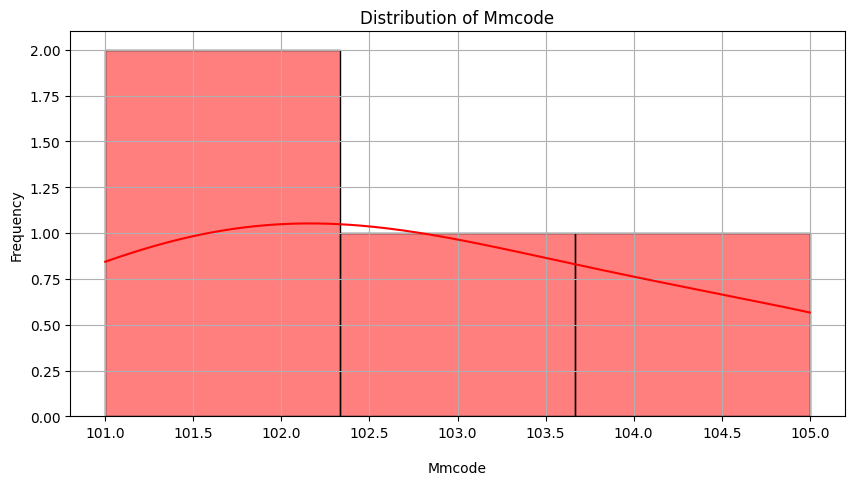

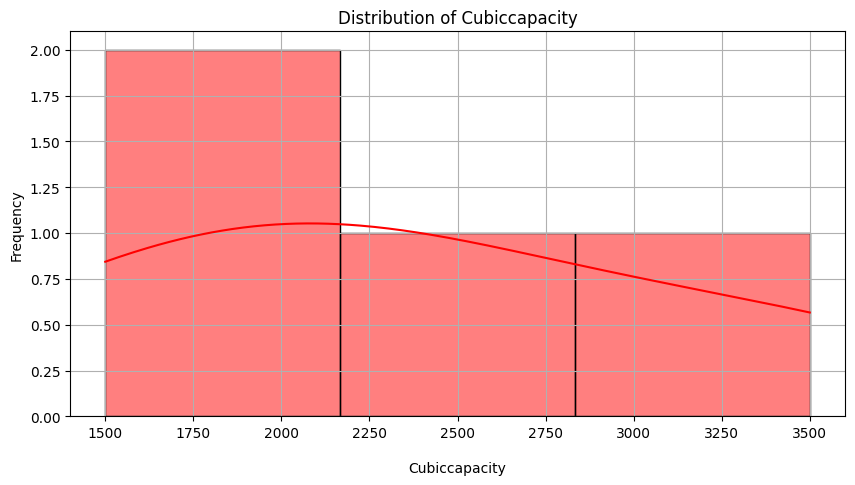

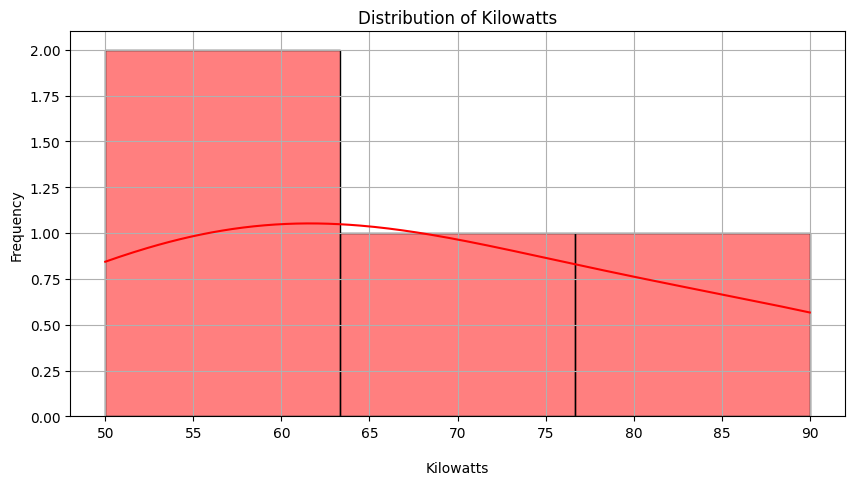

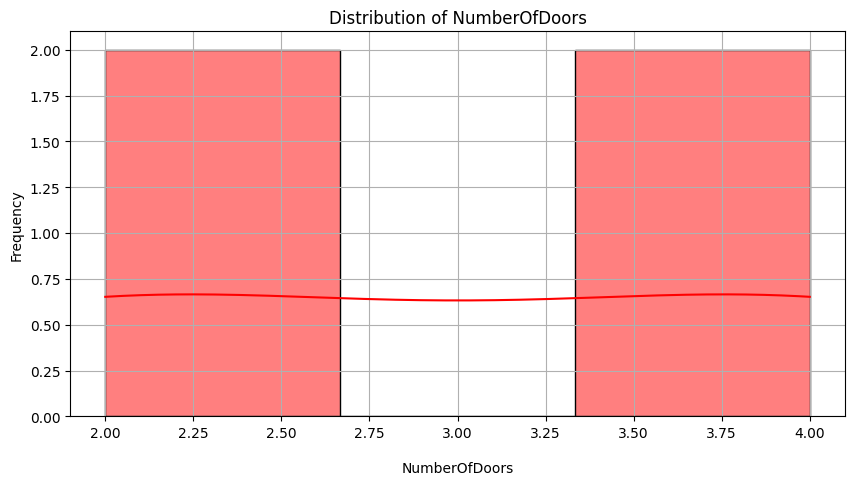

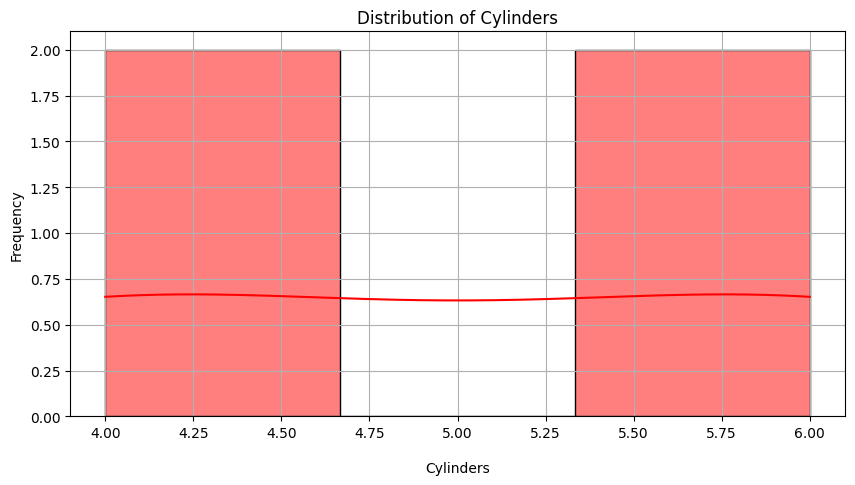

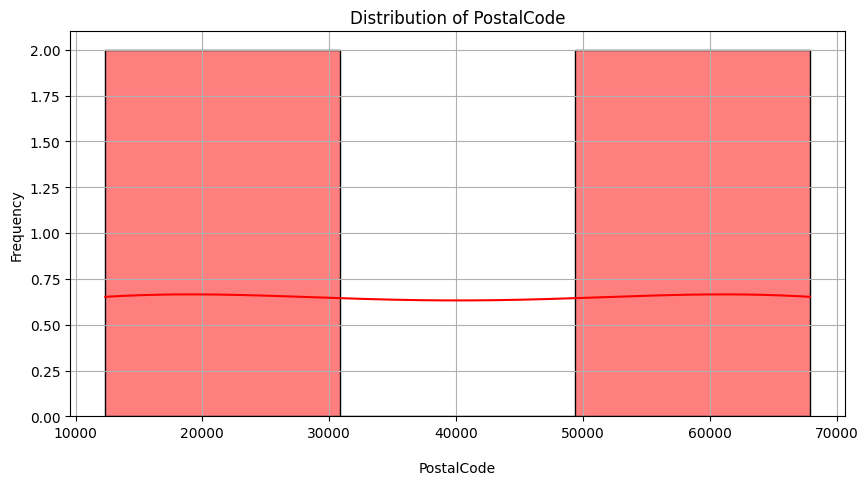

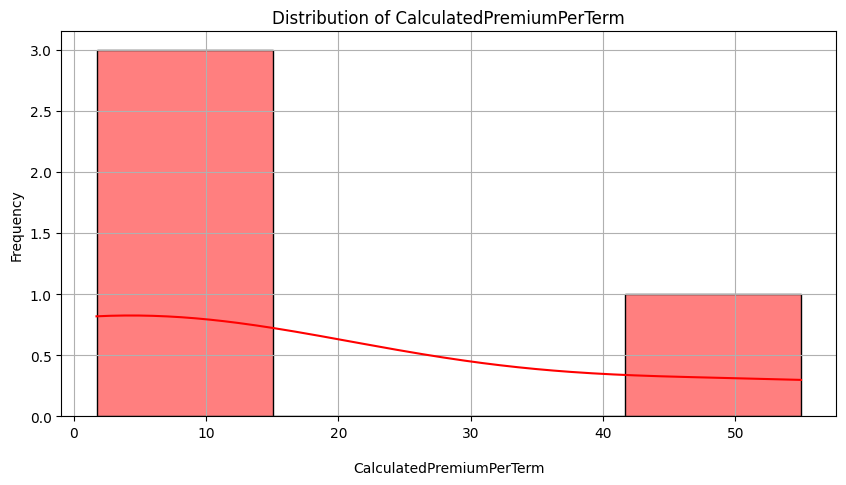


Plotting Bar Charts for Categorical Columns with more than one unique values:


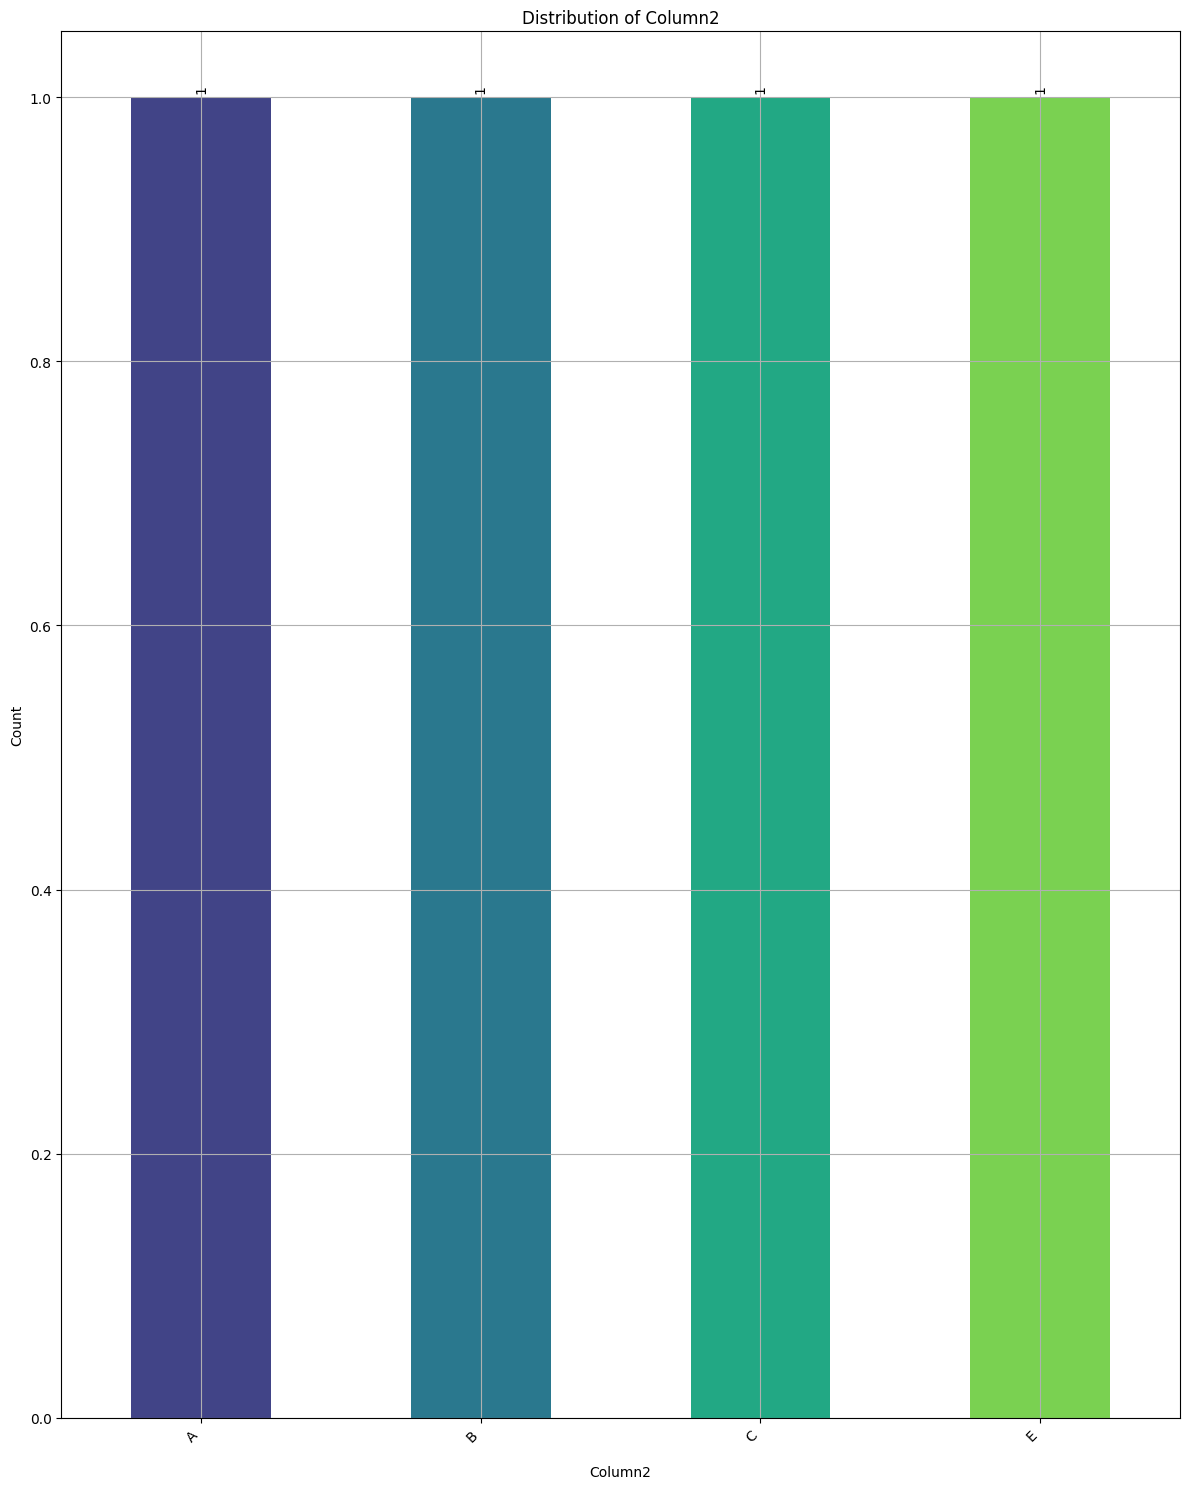

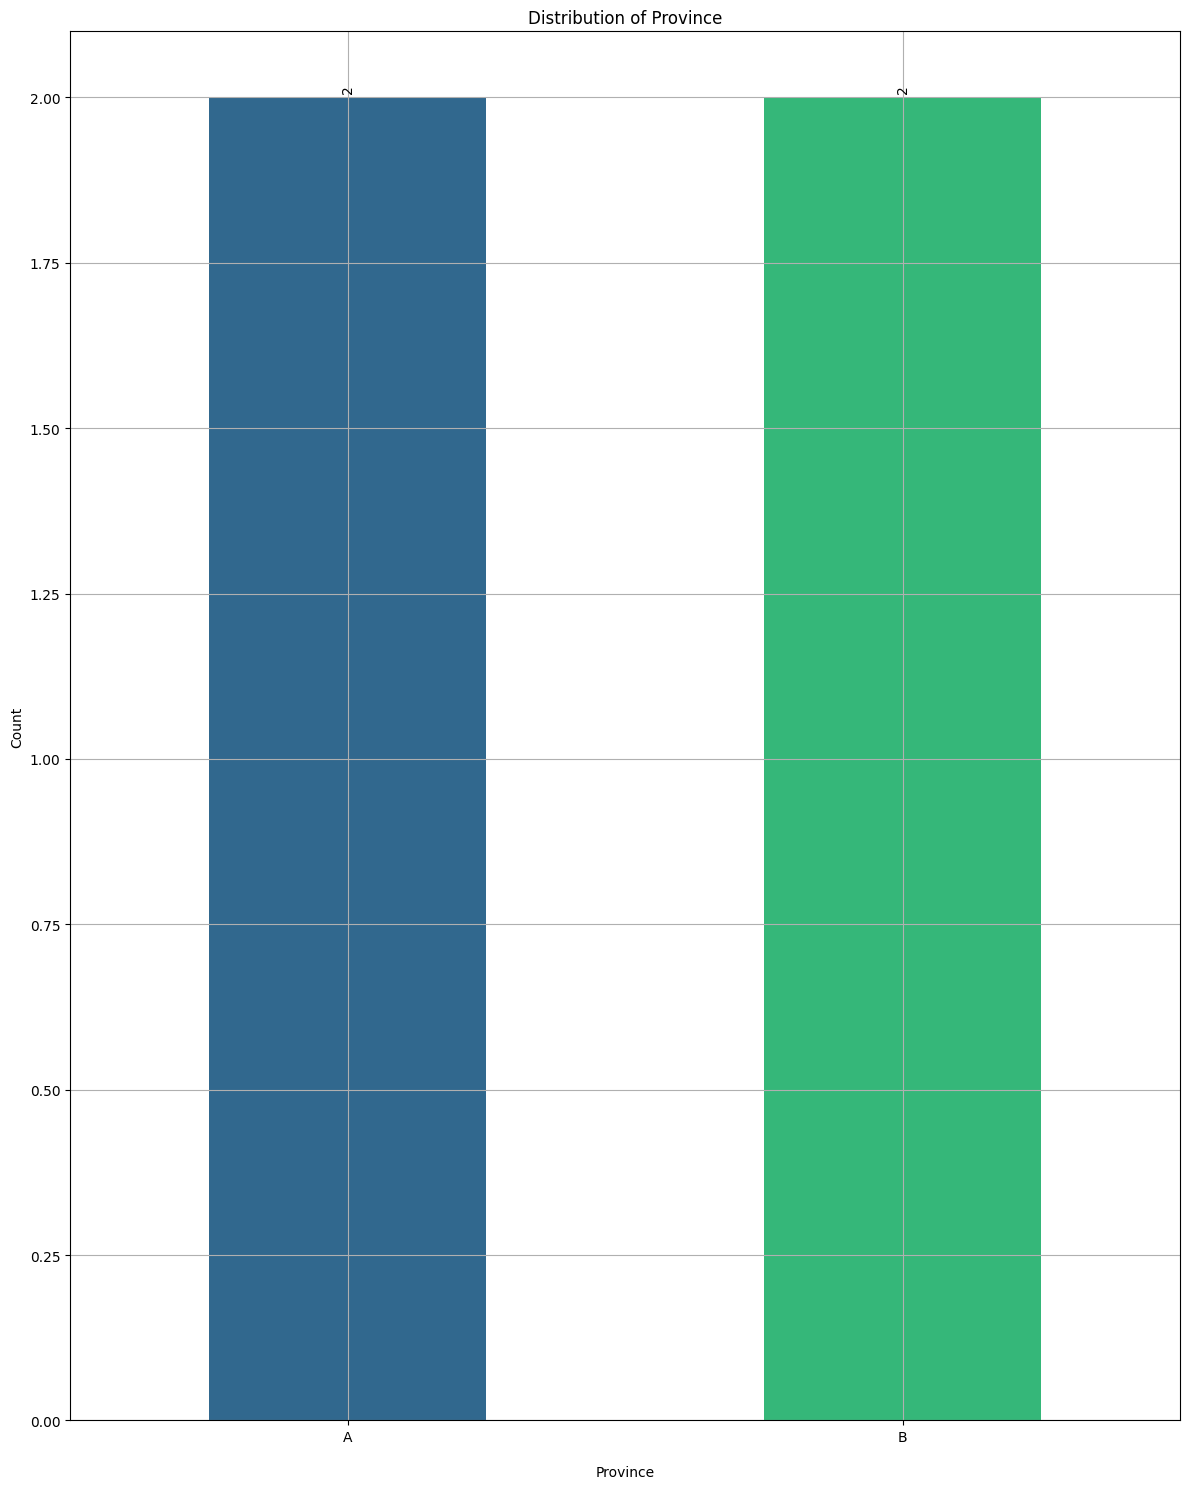

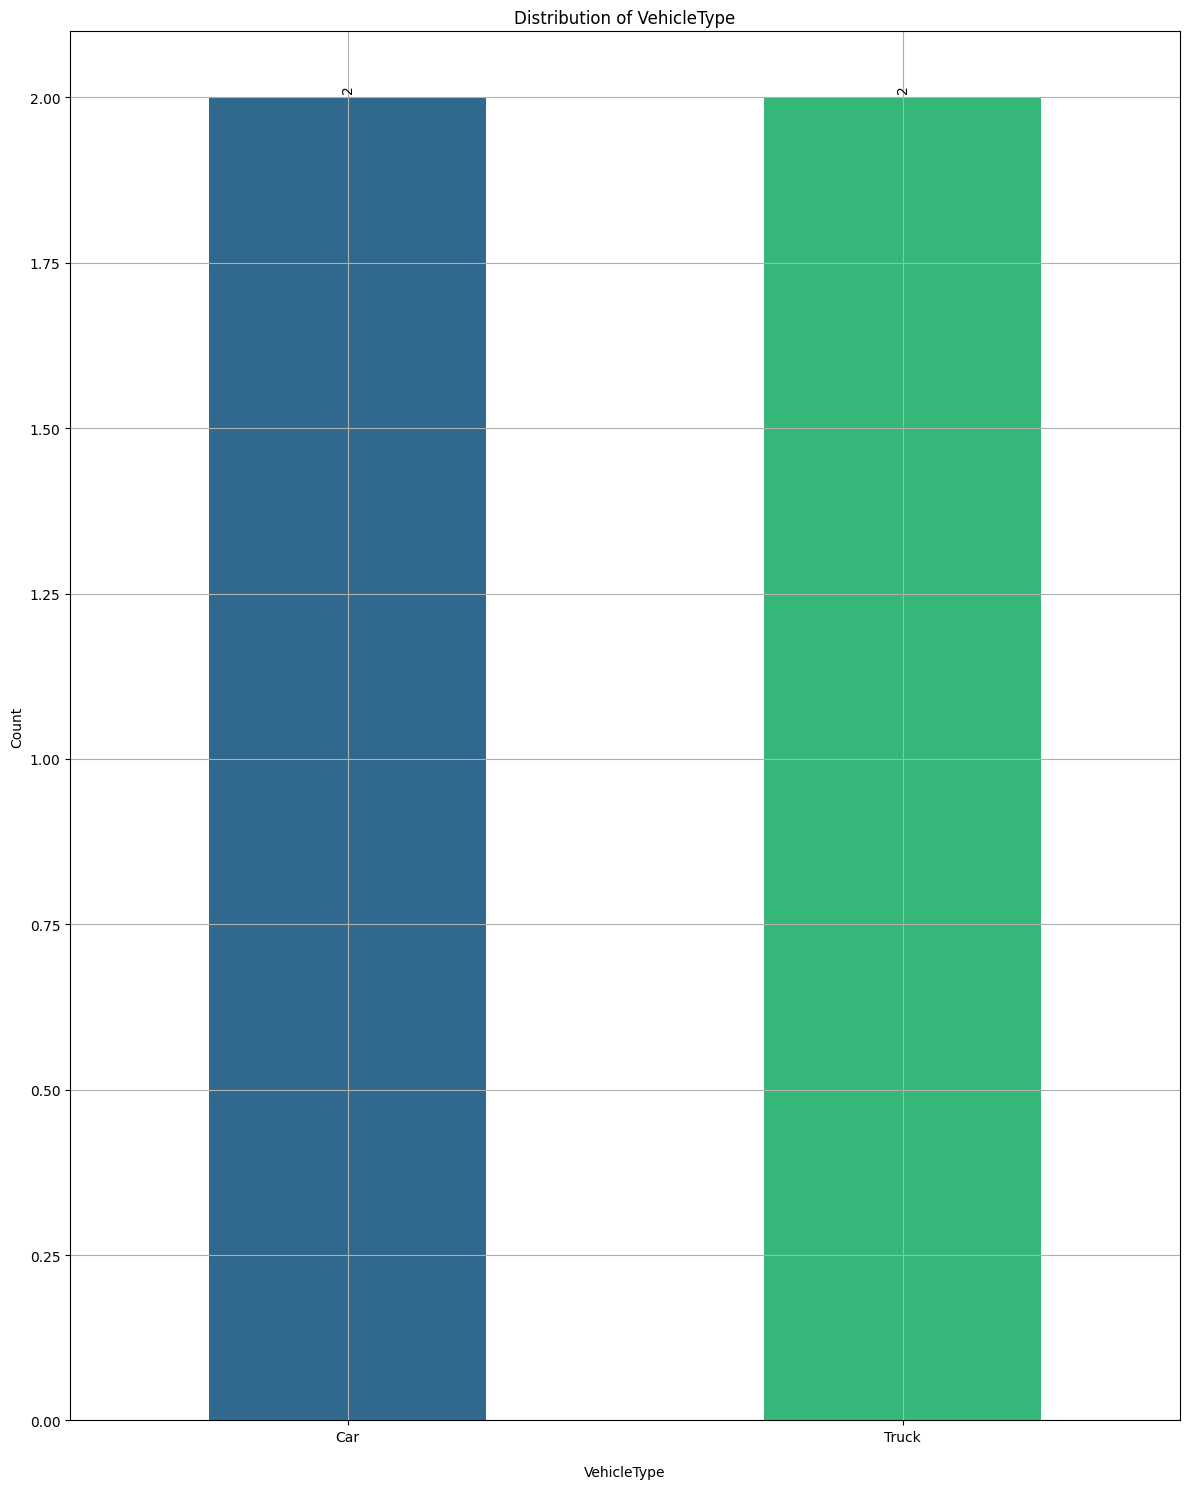

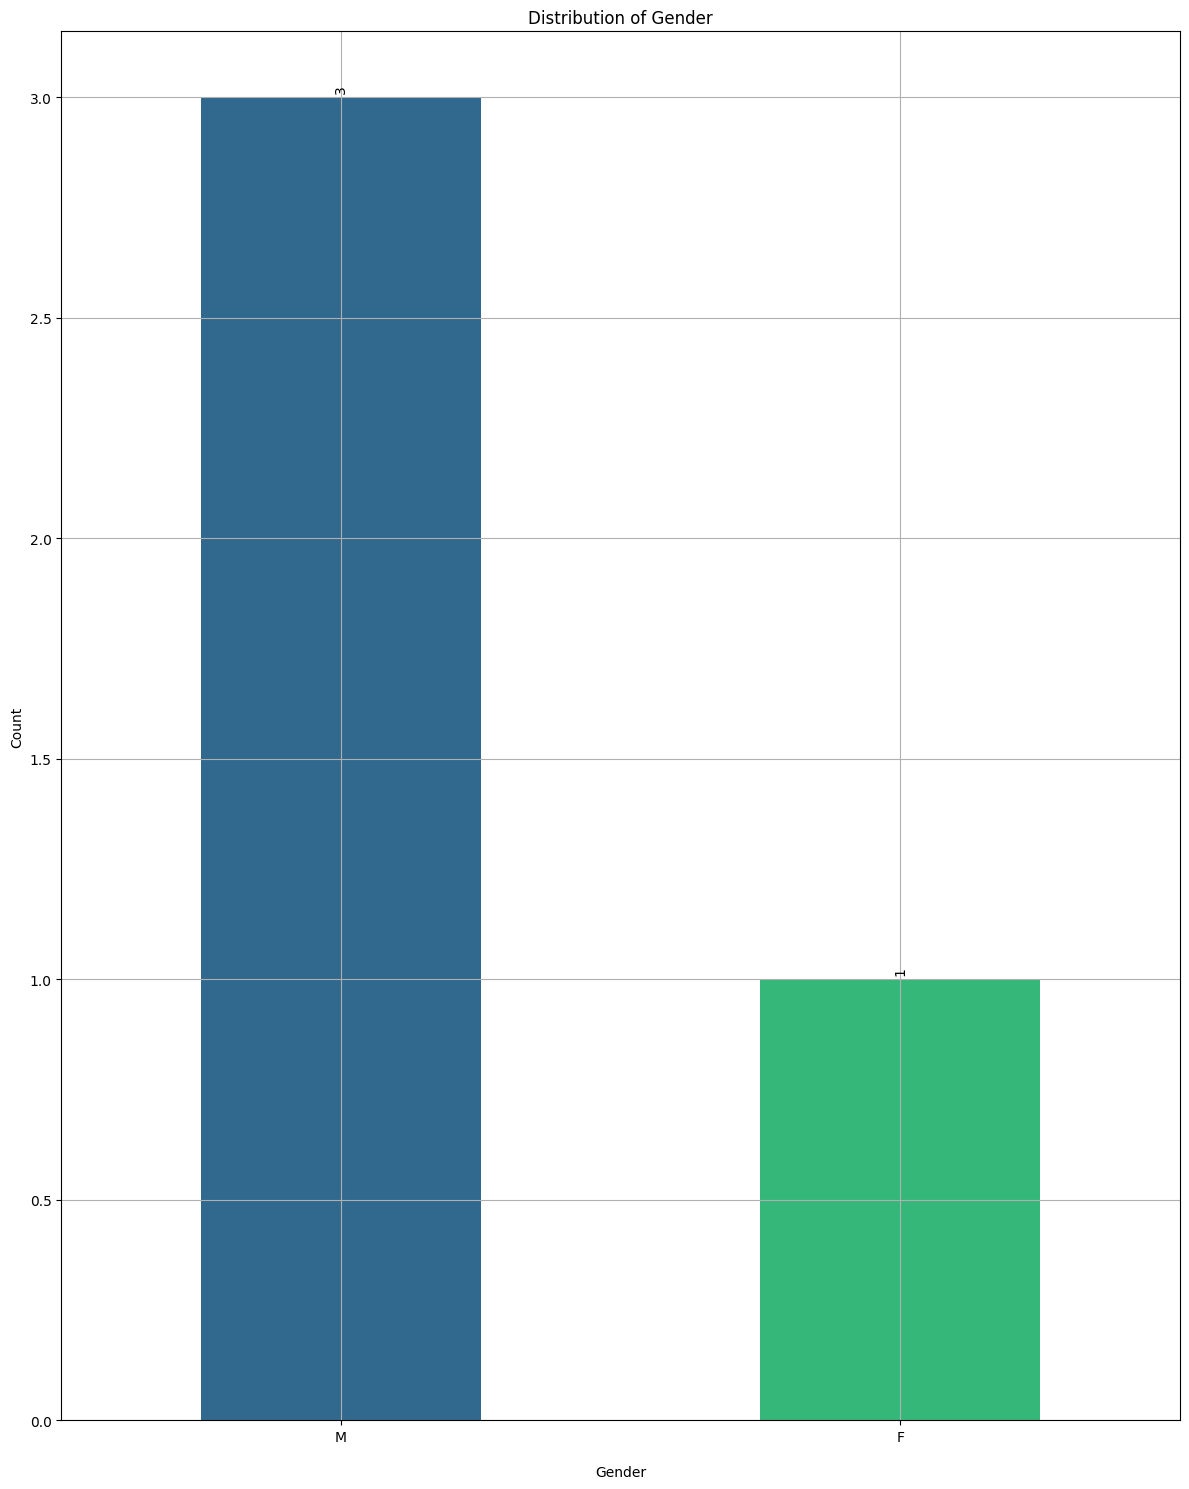

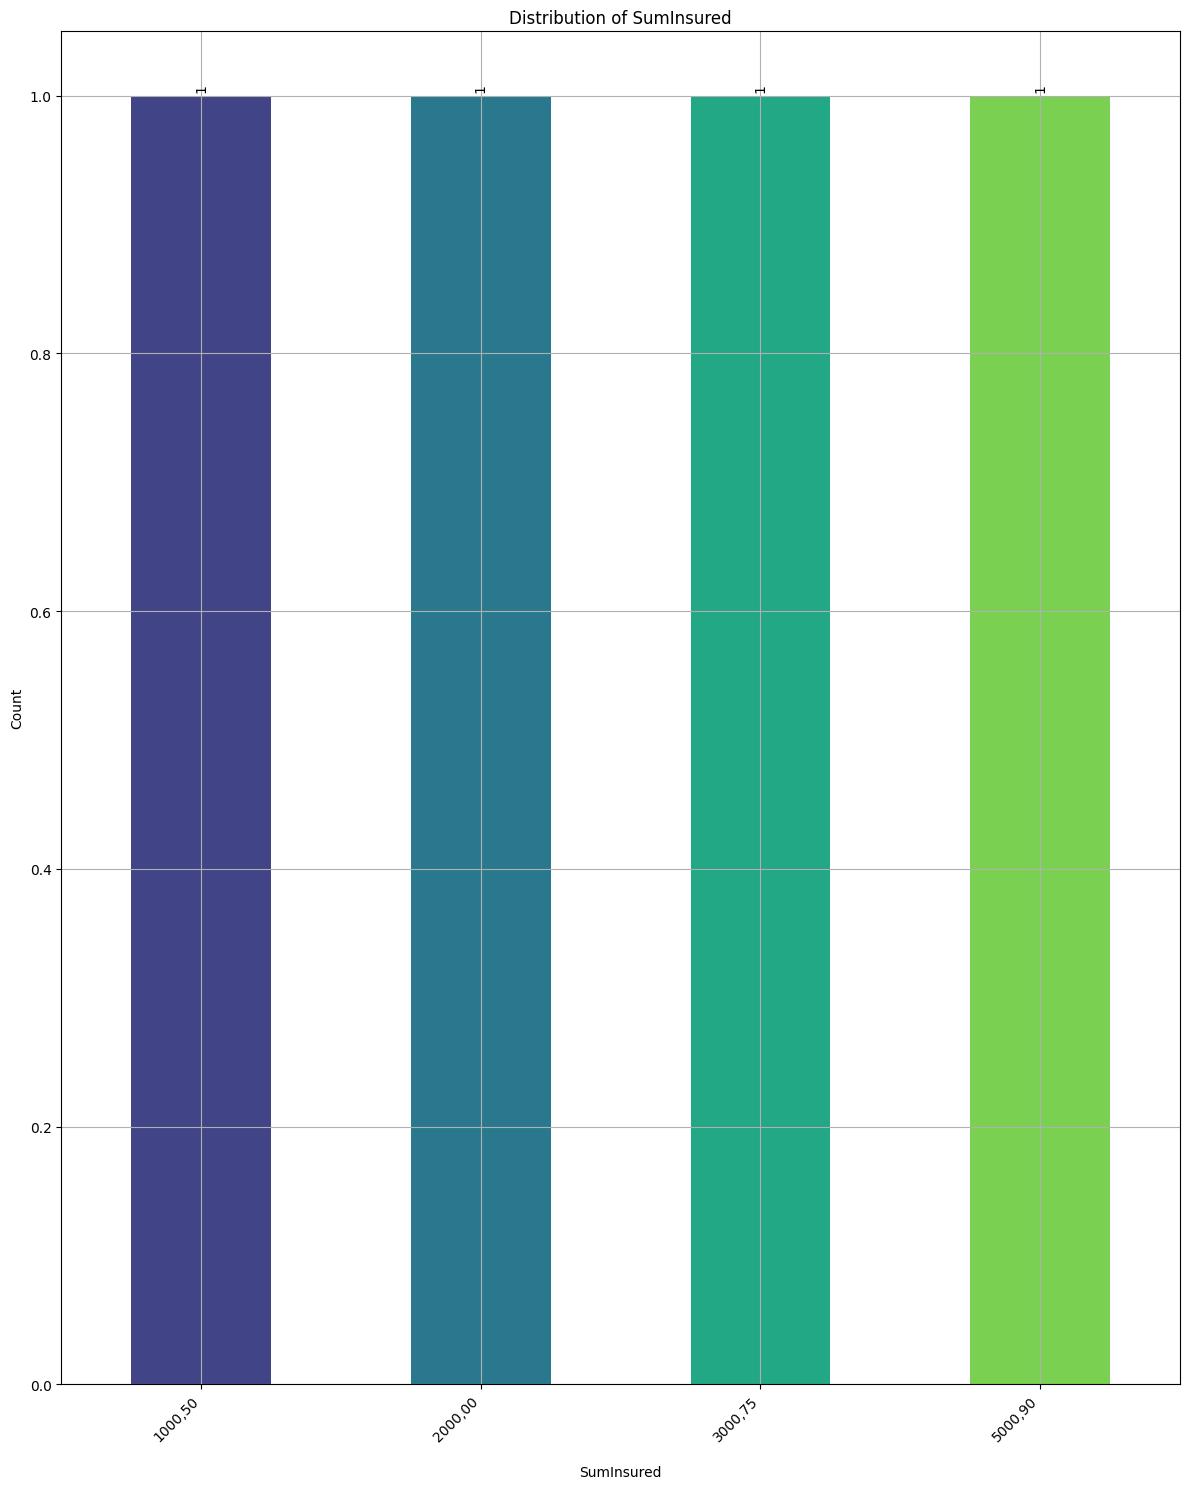

.
----------------------------------------------------------------------
Ran 8 tests in 17.053s

OK


In [1]:
import unittest
import pandas as pd
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#define path
sys.path.append(os.path.abspath(os.path.join('..')))

#import custom modules
from scripts.EDA import EDA_procecssor


class TestEDAProcessor(unittest.TestCase):

    def setUp(self):
        """
        Set up a temporary dummy CSV file for testing.
        """
        self.test_df_path = 'test_data.csv'
        self.output_folder = 'test_output'
        self.plot_folder = 'test_plots'

        #create a dummy DataFrame
        data = {'Column1': [1, 2, 3, np.nan, 5],
                'column2': ['A', 'B', 'C', '  ', 'E'],
                'TransactionMonth': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
                'RegistrationYear': [2020, 2021, 2022, 2023, 2024],
                'VehicleIntroDate': ['2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01'],
                'TotalClaims': [100, 200, 300, 400, 500],
                'TotalPremium': [1000, 2000, 3000, 4000, 5000],
                'Province': ['A', 'B', 'A', 'C', 'B'],
                'VehicleType': ['Car', 'Truck', 'Car', 'Van', 'Truck'],
                'Gender': ['M', 'F', 'M', 'F', 'M'],
                'SumInsured': ['1000,50', '2000,00', '3000,75', '4000,20', '5000,90'],
                'CapitalOutstanding': ['500,10', '600,20', '700,30', '800,40', '900,50'],
                'Mmcode': [101, 102, 103, 104, 105],
                'Cubiccapacity': [1500, 2000, 2500, 3000, 3500],
                'Kilowatts': [50, 60, 70, 80, 90],
                'NumberOfDoors': [4, 2, 4, 3, 2],
                'Cylinders': [4, 6, 4, 8, 6],
                'Make': ['Toyota', 'Ford', 'Honda', 'Nissan', 'Ford'],
                'Model': ['Camry', 'F-150', 'Civic', 'Sentra', 'Mustang'],
                'PostalCode': ['12345', '67890', '12345', '11223', '67890'],
                'CalculatedPremiumPerTerm' : [4.5, 5.0004, 54.97, 0.23, 1.72]}
        self.dummy_df = pd.DataFrame(data)

        #save the dummy DataFrame to a CSV file
        self.dummy_df.to_csv(self.test_df_path, sep='|', index=False)

        #create directories if they don't exist
        os.makedirs(self.output_folder, exist_ok=True)
        os.makedirs(self.plot_folder, exist_ok=True)



    def tearDown(self):
        """
        Clean up the temporary dummy CSV file and folders.
        """
        if os.path.exists(self.test_df_path):
            os.remove(self.test_df_path)
        if os.path.exists(self.output_folder):
            for root, dirs, files in os.walk(self.output_folder, topdown=False):
                for name in files:
                    os.remove(os.path.join(root, name))
                for name in dirs:
                    os.rmdir(os.path.join(root, name))
            os.rmdir(self.output_folder)
        if os.path.exists(self.plot_folder):
            for root, dirs, files in os.walk(self.plot_folder, topdown=False):
                for name in files:
                    os.remove(os.path.join(root, name))
                for name in dirs:
                    os.rmdir(os.path.join(root, name))
            os.rmdir(self.plot_folder)



    def test_load_df(self):
        """
        Test the load_df method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        df = processor.load_df()

        #check if DataFrame is loaded and not None
        self.assertIsNotNone(df)

        #check if columns are capitalized
        self.assertTrue(all(col[0].isupper() for col in df.columns))

        #check if empty strings are replaced with NaN
        self.assertFalse((df == '  ').any().any())
        self.assertFalse(df['Column1'].isnull().any())

        #check if the TransactionMonth column is in datetime format and sorted
        self.assertTrue(pd.api.types.is_datetime64_any_dtype(df['TransactionMonth']))
        self.assertTrue(df['TransactionMonth'].is_monotonic_increasing)

        #check if the processed DataFrame is saved
        processed_df_path = os.path.join(self.output_folder, 'processed_insurance_data.csv')
        self.assertTrue(os.path.exists(processed_df_path))



    def test_calculate_loss(self):
        """
        Test the calculate_loss method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        processor.load_df()

        #check if the method runs without errors (basic check)
        try:
            processor.calculate_loss()
        except Exception as e:
            self.fail(f"calculate_loss raised an exception: {e}")



    def test_temporal_trends(self):
        """
        Test the temporal_trends method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        processor.load_df()

        # Check if the method runs without errors (basic check)
        try:
            processor.temporal_trends(self.plot_folder)
        except Exception as e:
            self.fail(f"temporal_trends raised an exception: {e}")

        # Check if the plot is saved
        plot_path = os.path.join(self.plot_folder, 'Claim Frequency and Claim Severity per Month.png')
        self.assertTrue(os.path.exists(plot_path))



    def test_make_model_claim(self):
        """
        Test the make_model_claim method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        processor.load_df()

        # Check if the method runs without errors (basic check)
        try:
            processor.make_model_claim()
        except Exception as e:
            self.fail(f"make_model_claim raised an exception: {e}")



    def test_univariate_analysis_visualiser(self):
        """
        Test the univariate_analysis_visualiser method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        processor.load_df()

        # Check if the method runs without errors (basic check)
        try:
            processor.univariate_analysis_visualiser()
        except Exception as e:
            self.fail(f"univariate_analysis_visualiser raised an exception: {e}")



    def test_bivariate_analysis_and_visualiser(self):
        """
        Test the bivariate_analysis_and_visualiser method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        processor.load_df()

        # Check if the method runs without errors (basic check)
        try:
            processor.bivariate_analysis_and_visualiser()
        except Exception as e:
            self.fail(f"bivariate_analysis_and_visualiser raised an exception: {e}")

        # Similar to univariate tests, testing plot content directly is complex.



    def test_geographic_trends_analysis_and_visualiser(self):
        """
        Test the geographic_trends_analysis_and_visualiser method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        processor.load_df()

        # Check if the method runs without errors (basic check)
        try:
            processor.geographic_trends_analysis_and_visualiser(self.plot_folder)
        except Exception as e:
            self.fail(f"geographic_trends_analysis_and_visualiser raised an exception: {e}")

        # Check if the plot is saved
        plot_path = os.path.join(self.plot_folder, 'Distribution of Insurance Cover Type by Province.png')
        self.assertTrue(os.path.exists(plot_path))



    def test_outlier_detection_boxplots(self):
        """
        Test the outlier_detection_boxplots method.
        """
        processor = EDA_procecssor(self.test_df_path, self.output_folder, self.plot_folder)
        processor.load_df()

        # Check if the method runs without errors (basic check)
        try:
            processor.outlier_detection_boxplots(self.plot_folder)
        except Exception as e:
            self.fail(f"outlier_detection_boxplots raised an exception: {e}")

        # Check if the plot is saved
        plot_path = os.path.join(self.plot_folder, 'Box Plot of TotalPremium for Outlier Detection.png')
        self.assertTrue(os.path.exists(plot_path))




if __name__ == '__main__':
    import sys
    unittest.main(argv=['first-arg-is-ignored'], exit=False)